<a href="https://colab.research.google.com/github/tackulus/229351/blob/main/610510531_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ `studentID_LAB01.ipynb` (เลือก File -> Download .ipynb) แล้วส่งที่ Microsoft Teams

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://www.donlapark.cmustat.com/229351/data/housing.csv

In [ ]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

housing = pd.read_csv("housing.csv")

housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Basic data exploration

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Which variable has missing data?

In [ ]:
housing = housing.dropna()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://www.donlapark.cmustat.com/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า `Ads` โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [ ]:
# 2
Ads = pd.read_csv('Advertising.csv')

# 3
Ads.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# 4
Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
Ads.isnull().values.any()

False

In [ ]:
# 5
Ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Calling, indexing & modifying dataframes

In [ ]:
# calling a column

housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

`ocean_proximity` is categorical. Let's count its values.

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

## Basic statistics of a variable

In [ ]:
print("Mean: ",housing["total_rooms"].mean())
print("Standard deviation: ",housing["total_rooms"].std())
print("Maximum: ",housing["total_rooms"].max())
print("Minimum: ",housing["total_rooms"].min())

Mean:  2636.5042333480155
Standard deviation:  2185.269566977597
Maximum:  39320.0
Minimum:  2.0


In [ ]:
housing[["longitude", "latitude", "housing_median_age"]]

,longitude,latitude,housing_median_age
0,-122.23,37.88,41.0
1,-122.22,37.86,21.0
2,-122.24,37.85,52.0
3,-122.25,37.85,52.0
4,-122.25,37.85,52.0
...,...,...,...
20635,-121.09,39.48,25.0
20636,-121.21,39.49,18.0
20637,-121.22,39.43,17.0
20638,-121.32,39.43,18.0


In [ ]:
housing[0:4]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


## Extracting a subset of dataframe

In [ ]:
housing.loc[1:3, "longitude"]

1   -122.22
2   -122.24
3   -122.25
Name: longitude, dtype: float64

In [ ]:
housing.iloc[1:3, 2:5]

,housing_median_age,total_rooms,total_bedrooms
1,21.0,7099.0,1106.0
2,52.0,1467.0,190.0


## Selecting rows based on conditions

In [ ]:
housing[housing['latitude']>=40]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
19803,-123.22,40.16,27.0,1848.0,449.0,396.0,150.0,2.8472,41300.0,INLAND
19804,-123.48,40.34,19.0,518.0,108.0,216.0,80.0,2.7083,64500.0,INLAND
19805,-123.43,40.22,20.0,133.0,35.0,87.0,37.0,3.6250,67500.0,INLAND


In [ ]:
housing[(housing['longitude']>-122) & (housing['latitude']>=40)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
3345,-121.11,41.07,26.0,1707.0,308.0,761.0,250.0,2.7188,48100.0,INLAND
3346,-120.96,41.12,29.0,779.0,136.0,364.0,123.0,2.5000,59200.0,INLAND
3347,-121.07,40.85,17.0,976.0,202.0,511.0,175.0,3.6641,80800.0,INLAND
3348,-120.38,40.98,27.0,777.0,185.0,318.0,115.0,1.6833,40000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND
18824,-121.93,41.86,28.0,4225.0,835.0,1908.0,686.0,1.7400,44000.0,INLAND
18858,-121.76,41.50,31.0,602.0,153.0,112.0,47.0,1.0667,34200.0,INLAND
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810,79800.0,INLAND


## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedroom` 
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total bedroom`) มากกว่า 900 ห้อง

In [ ]:
# 1
housing.loc[200:400, 'total_bedrooms'].max()

2048.0

In [ ]:
# 2
housing[housing['total_rooms'] > 900].iloc[:, -3:]

,median_income,median_house_value,ocean_proximity
1,8.3014,358500.0,NEAR BAY
2,7.2574,352100.0,NEAR BAY
3,5.6431,341300.0,NEAR BAY
4,3.8462,342200.0,NEAR BAY
5,4.0368,269700.0,NEAR BAY
...,...,...,...
20634,3.7125,116800.0,INLAND
20635,1.5603,78100.0,INLAND
20637,1.7000,92300.0,INLAND
20638,1.8672,84700.0,INLAND


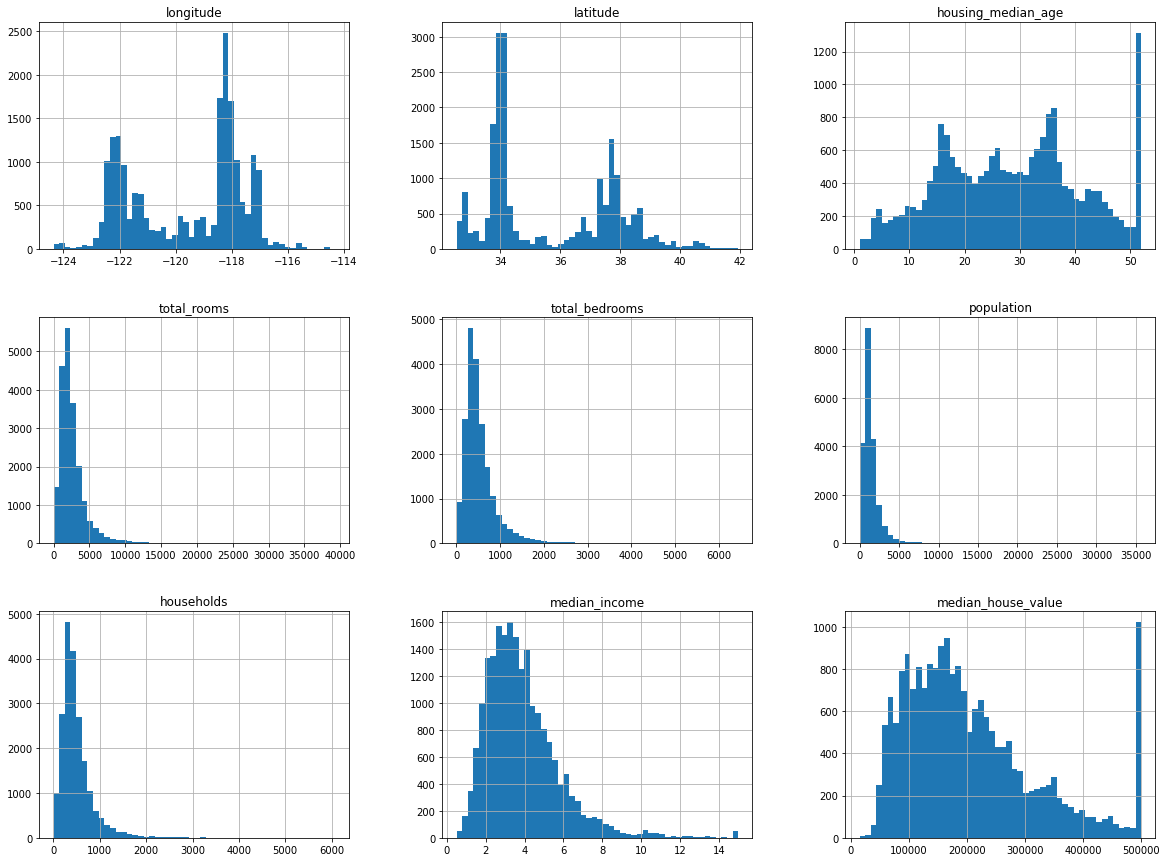

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, shuffle=True)
print(len(train_set), "train +", len(test_set), "test")

16346 train + 4087 test


In [ ]:
train_set.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,<1H OCEAN
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,INLAND
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,INLAND


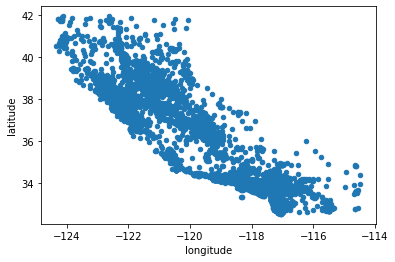

In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude")

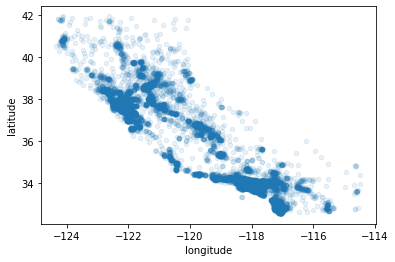

In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
corr_matrix = train_set.corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


## Exercise 3

จาก dataframe `Ads` ที่ได้
1. สร้าง histogram ของตัวแปรต่างๆ โดยเลือกจำนวณ bin ให้เหมาะสม
2. แบ่งข้อมูลออกเป็น Training set กับ Test set โดยมีสัดส่วนการแบ่งเป็น 75%-25%
3. จาก Training set ที่ได้ จงหาว่าช่องทางการโฆษณาใดที่มีความสัมพันธ์เชิงเส้นกับผลการขาย (Sales) มากที่สุด แล้วสร้าง scatter plot ระหว่าง Sales กับตัวแปรนั้น

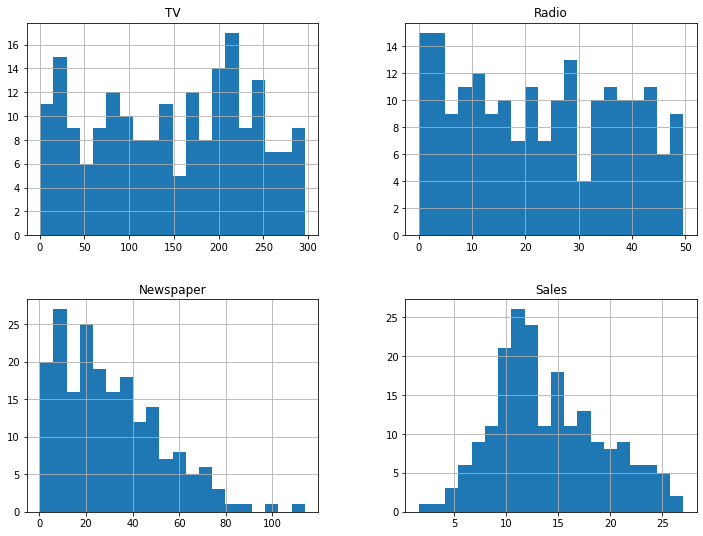

In [ ]:
# 1
Ads.hist(bins=20, figsize=(12,9))
plt.show()

In [ ]:
# 2
train_set, test_set = train_test_split(Ads, test_size=0.25, random_state=42, shuffle=True)
print(len(train_set), "train +", len(test_set), "test")

150 train + 50 test


In [ ]:
# 3
train_set.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.043265,0.015895,0.768570
Radio,0.043265,1.000000,0.382034,0.585775
Newspaper,0.015895,0.382034,1.000000,0.232071
Sales,0.768570,0.585775,0.232071,1.000000


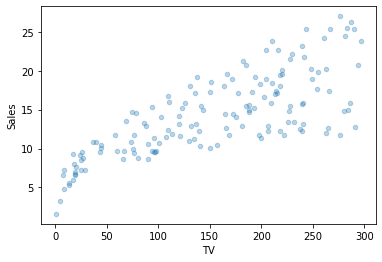

In [ ]:
train_set.plot(kind="scatter", x="TV", y="Sales", alpha=0.3)
plt.show()